<a href="https://colab.research.google.com/github/DENGCPU/TensorFlow-Study/blob/main/%E5%AE%98%E7%BD%91demo1_%E5%AF%B9%E6%9C%8D%E8%A3%85%E5%9B%BE%E5%83%8F%E8%BF%9B%E8%A1%8C%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


In [4]:
# 加载并准备fashion MNIST数据集
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

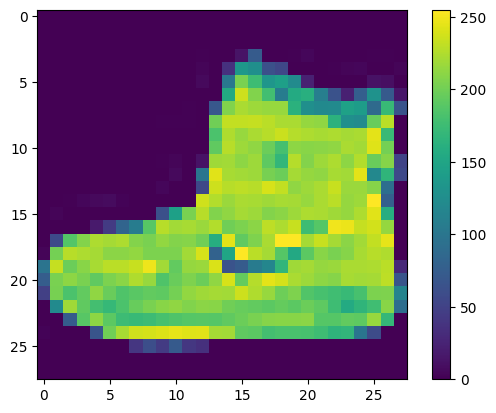

In [ ]:
# 预处理数据，像素值都在0-255之间
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


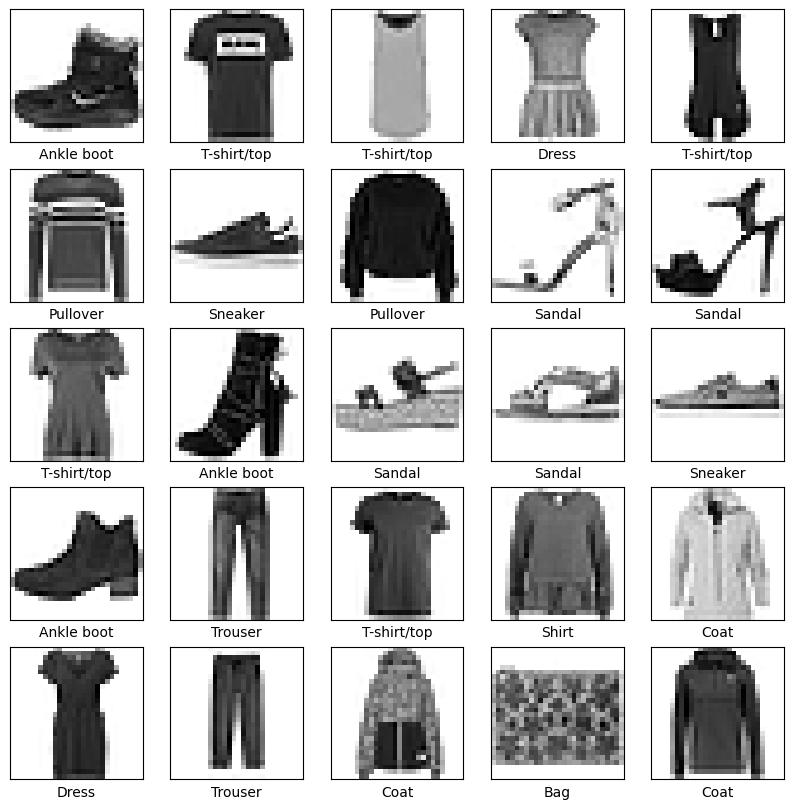

In [5]:
# 将像素值缩小到0-1之间，然后馈送到神经网络模型
train_images = train_images / 255.0
test_images = test_images  / 255.0

# 验证数据格式是否正确，显示训练集中的前25个图像
plt.figure(figsize=(10,10))
for i in range(25):
  # 5行5列，索引从1开始
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()


In [6]:
# 设置神经网络层
model = tf.keras.Sequential([
    # 将图像格式从二维数据转成1维数组
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 第一个Dense层有128个节点（神经元）
    tf.keras.layers.Dense(128,activation='relu'),
    # 第二层返回一个长度为10的logits数组
    tf.keras.layers.Dense(10)
])
# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 向模型馈送数据
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4971 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3345 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3112 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2916 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2781 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2657 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2461 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [7]:
# 评估准确率, 模型在测试集上的表现
# 每个epoch 一行日志
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3425 - accuracy: 0.8763 - 946ms/epoch - 3ms/step

Test accuracy: 0.8762999773025513


In [8]:
# 进行预测
# 附加一个softmax层，为了将模型的线性输出logits转为更容易理解的概率

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

prediction = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [ ]:
prediction[0]  # 10种不同标签的"置信度"

array([8.8565253e-07, 2.6764175e-09, 3.8207100e-09, 1.7948317e-08,
       3.2814740e-09, 1.3476185e-02, 1.4382761e-06, 9.9285021e-03,
       4.1181264e-10, 9.7659290e-01], dtype=float32)

In [ ]:
np.argmax(prediction[0])

9

In [ ]:
test_labels[0]

9

In [13]:
# 绘制图表，看模型对全部10个类的预测：
def plot_image(i, predictions_array,true_label, img):
  true_label, img  = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
             color= color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array,color='#777777')
  plt.ylim([0,1])
  predicted_label= np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


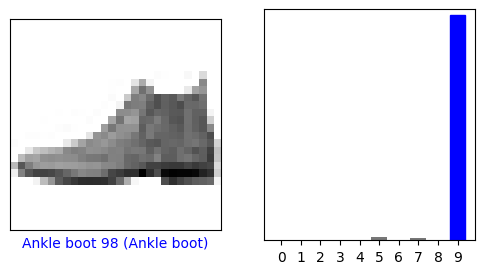

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,prediction[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],test_labels)
plt.show()

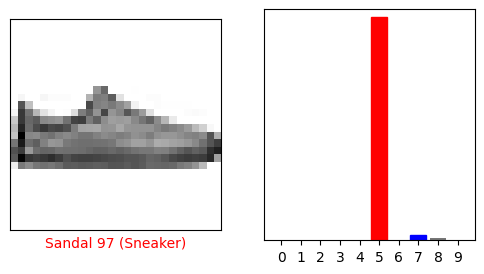

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

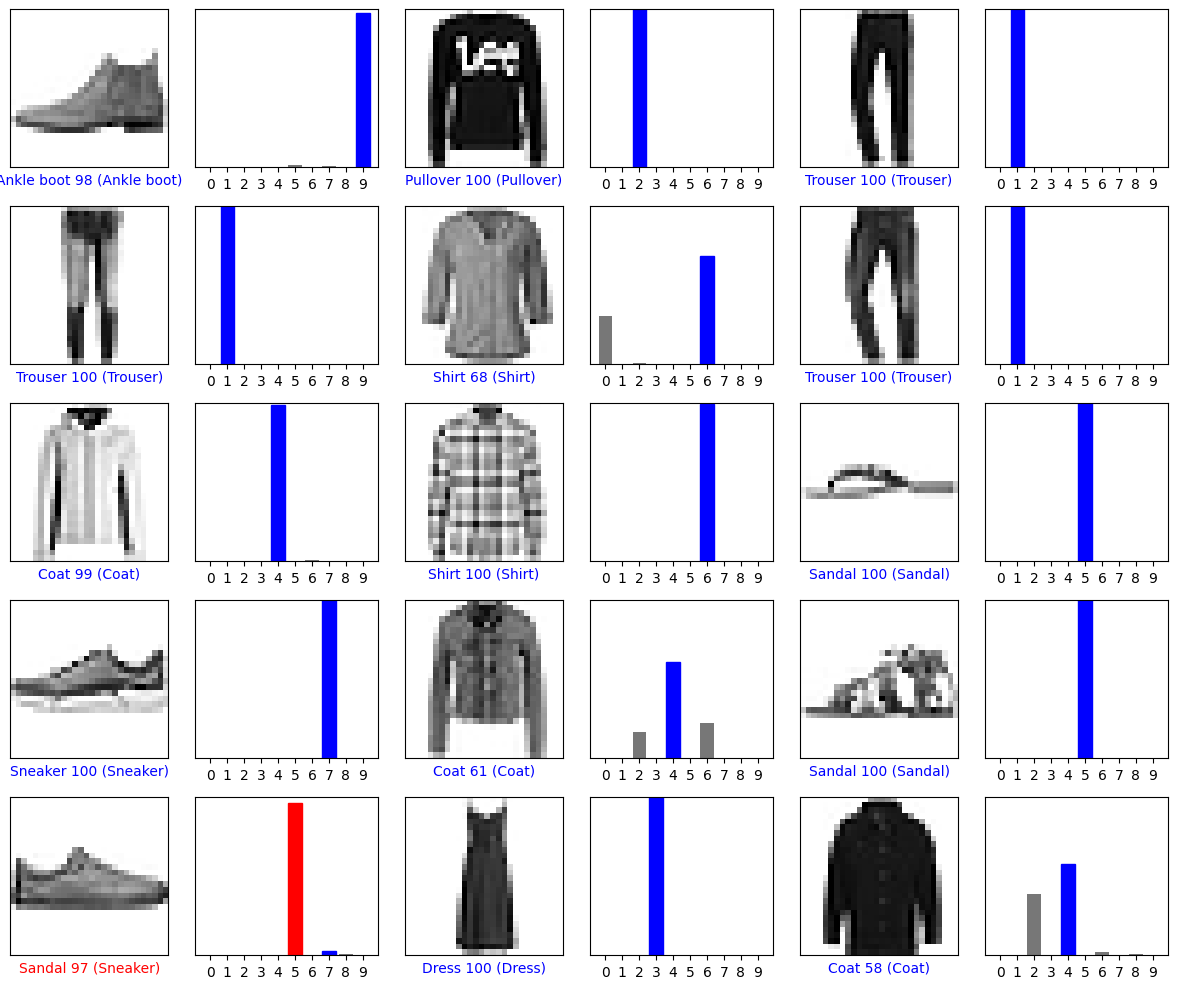

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

In [10]:
# 使用训练好的模型，对单个图像进行预测
img = test_images[1]
print(img.shape)

(28, 28)


In [11]:
# tf.keras可同时对一个批次或一组样本进行预测
# 即使只需要预测一个图像，也需要将其添加到列表中
img = (np.expand_dims(img,0))  # 新轴插入最前面
print(img.shape)

(1, 28, 28)


In [12]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[2.2765062e-05 1.2224104e-10 9.7348070e-01 2.7288726e-07 1.0200189e-02
  8.1432205e-12 1.6295986e-02 9.1451025e-10 5.1535265e-09 7.9193414e-12]]


In [16]:
np.argmax(predictions_single[0])

2

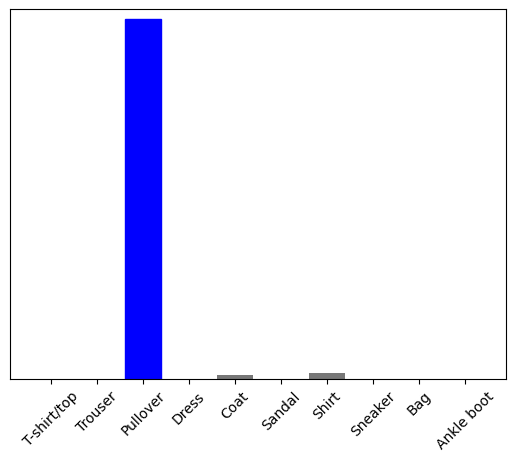

In [15]:
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10), class_names,rotation = 45)
plt.show()